<a href="https://colab.research.google.com/github/shadeeperez/BDB/blob/main/Break_Down_Beats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BREAKING DOWN THE BEATS

#Project Setup

In [ ]:
# Installing Spotify
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 kB 6.9 MB/s eta 0:00:00


In [ ]:
# Import libraries
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
# Setting up Spotipy client credentials
client_id = '0f84c351542d4f9e9823c0f0f763d698'
client_secret = '87d2b05f630a478cac9b263b07dc19ee'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

Create a method that we can pass every song from the playlist into to get data.

In [ ]:
def get_track_details(playlist_uri):
    # playlist details and tracks
    playlist = sp.playlist(playlist_uri)
    tracks = playlist['tracks']['items']

    # list to store the track details
    track_details = []

    for track in tracks:
        # track name, artist name, and duration
        track_name = track['track']['name']
        artist_name = track['track']['artists'][0]['name']
        duration_ms = track['track']['duration_ms']

        # artist details and retrieve the genre
        artist_details = sp.search(q='artist:' + artist_name, type='artist')
        genres = artist_details['artists']['items'][0]['genres']
        genre = genres[0] if genres else None

        # number of times the track has been streamed and its ID
        track_id = track['track']['id']
        stream_count = sp.track(track_id)['popularity']

        # Get the release date of the track
        release_date = track['track']['album']['release_date']

        # Append the details to the track_details list, including the track ID and popularity
        track_details.append({'Track Name': track_name, 'Artist Name': artist_name, 'Duration (ms)': duration_ms, 'Genre': genre, 'Track ID': track_id, 'Release Date': release_date, 'Popularity': stream_count})
    #removed stream count
    # Convert the track details list to a pandas DataFrame
    df = pd.DataFrame(track_details)

    # Return the DataFrame
    return df


#1 Read in Data

In [ ]:
#90's playlist
playlist_90 = 'spotify:playlist:37i9dQZF1DXbTxeAdrVG2l'
# Get the track details for the playlist and print the resulting DataFrame
nines_df = get_track_details(playlist_90)
nines_df

,Track Name,Artist Name,Duration (ms),Genre,Track ID,Release Date,Popularity
0,Gangsta's Paradise,Coolio,240693,g funk,1DIXPcTDzTj8ZMHt3PDt8p,1995-11-07,87
1,Creep,Radiohead,238640,alternative rock,70LcF31zb1H0PyJoS1Sx1r,1993-02-22,86
2,Losing My Religion,R.E.M.,268426,alternative rock,31AOj9sFz2gM0O3hMARRBx,1991-03-12,85
3,Thunderstruck,AC/DC,292880,australian rock,57bgtoPSgt236HzfBOd8kj,1990-09-24,85
4,Iris,The Goo Goo Dolls,289533,neo mellow,6Qyc6fS4DsZjB2mRW9DsQs,1998-09-11,85
...,...,...,...,...,...,...,...
95,Waterfalls,TLC,279506,atl hip hop,6qspW4YKycviDFjHBOaqUY,1994-11-15,75
96,Angels,Robbie Williams,265000,dance rock,1M2nd8jNUkkwrc1dgBPTJz,1997-01-01,75
97,"I Don't Want to Miss a Thing - From ""Armageddo...",Aerosmith,298760,album rock,225xvV8r1yKMHErSWivnow,1998-06-23,75
98,Jump Around - 30 Years Remaster,House Of Pain,218546,gangster rap,7L93GESzq43UkKUt5FsOCq,2022-07-22,74


In [ ]:
#2000's playlist
playlist_00 = 'spotify:playlist:37i9dQZF1DX4o1oenSJRJd'

thousands_df = get_track_details(playlist_00)
thousands_df

,Track Name,Artist Name,Duration (ms),Genre,Track ID,Release Date,Popularity
0,Yellow,Coldplay,266773,permanent wave,3AJwUDP919kvQ9QcozQPxg,2000-07-10,90
1,Without Me,Eminem,290320,detroit hip hop,7lQ8MOhq6IN2w8EYcFNSUk,2002-05-26,89
2,In the End,Linkin Park,216880,alternative metal,60a0Rd6pjrkxjPbaKzXjfq,2000-10-24,87
3,Mr. Brightside,The Killers,222973,alternative rock,003vvx7Niy0yvhvHt4a68B,2004,86
4,Hips Don't Lie (feat. Wyclef Jean),Shakira,218093,colombian pop,3ZFTkvIE7kyPt6Nu3PEa7V,2005-11-28,86
...,...,...,...,...,...,...,...
95,Kiss Me Thru The Phone,Soulja Boy,193386,atl hip hop,2q4rjDy9WhaN3o9MvDbO21,2008-01-01,78
96,Lady - Hear Me Tonight,Modjo,307153,disco house,49X0LAl6faAusYq02PRAY6,2001,78
97,When You Were Young,The Killers,220426,alternative rock,70wYA8oYHoMzhRRkARoMhU,2006-09-27,78
98,Poker Face,Lady Gaga,237200,art pop,5R8dQOPq8haW94K7mgERlO,2008-01-01,78


In [ ]:
#2010's playlist
playlist_00 = 'spotify:playlist:37i9dQZF1DX5Ejj0EkURtP'

tens_df = get_track_details(playlist_00)
tens_df

,Track Name,Artist Name,Duration (ms),Genre,Track ID,Release Date,Popularity
0,Starboy,The Weeknd,230453,canadian contemporary r&b,7MXVkk9YMctZqd1Srtv4MB,2016-11-25,93
1,Another Love,Tom Odell,244360,chill pop,3JvKfv6T31zO0ini8iNItO,2013-06-24,92
2,See You Again (feat. Kali Uchis),"Tyler, The Creator",180386,hip hop,7KA4W4McWYRpgf0fWsJZWB,2017-07-21,92
3,Sure Thing,Miguel,195373,r&b,0JXXNGljqupsJaZsgSbMZV,2010-11-26,91
4,Sweater Weather,The Neighbourhood,240400,modern alternative rock,2QjOHCTQ1Jl3zawyYOpxh6,2013-04-19,91
...,...,...,...,...,...,...,...
95,R U Mine?,Arctic Monkeys,201726,garage rock,2AT8iROs4FQueDv2c8q2KE,2013-09-09,83
96,Only Girl (In The World),Rihanna,235493,barbadian pop,2ENexcMEMsYk0rVJigVD3i,2010-01-01,83
97,Bad Romance,Lady Gaga,294573,art pop,0SiywuOBRcynK0uKGWdCnn,2009-11-05,83
98,Infinity,Jaymes Young,237720,indie poptimism,1SOClUWhOi8vHZYMz3GluK,2017-06-23,83


Concatinate all three dataframes into one master dataframe

In [ ]:
master_df = pd.concat([thousands_df, nines_df, tens_df], ignore_index=True)
master_df

,Track Name,Artist Name,Duration (ms),Genre,Track ID,Release Date,Popularity
0,Yellow,Coldplay,266773,permanent wave,3AJwUDP919kvQ9QcozQPxg,2000-07-10,90
1,Without Me,Eminem,290320,detroit hip hop,7lQ8MOhq6IN2w8EYcFNSUk,2002-05-26,89
2,In the End,Linkin Park,216880,alternative metal,60a0Rd6pjrkxjPbaKzXjfq,2000-10-24,87
3,Mr. Brightside,The Killers,222973,alternative rock,003vvx7Niy0yvhvHt4a68B,2004,86
4,Hips Don't Lie (feat. Wyclef Jean),Shakira,218093,colombian pop,3ZFTkvIE7kyPt6Nu3PEa7V,2005-11-28,86
...,...,...,...,...,...,...,...
295,R U Mine?,Arctic Monkeys,201726,garage rock,2AT8iROs4FQueDv2c8q2KE,2013-09-09,83
296,Only Girl (In The World),Rihanna,235493,barbadian pop,2ENexcMEMsYk0rVJigVD3i,2010-01-01,83
297,Bad Romance,Lady Gaga,294573,art pop,0SiywuOBRcynK0uKGWdCnn,2009-11-05,83
298,Infinity,Jaymes Young,237720,indie poptimism,1SOClUWhOi8vHZYMz3GluK,2017-06-23,83


## 1.1 Data Cleaning

Check if there are any null or empty values.

In [ ]:
master_df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Track Name  Artist Name  Duration (ms)  Genre  Track ID  Release Date  \
0         False        False          False  False     False         False   
1         False        False          False  False     False         False   
2         False        False          False  False     False         False   
3         False        False          False  False     False         False   
4         False        False          False  False     False         False   
..          ...          ...            ...    ...       ...           ...   
295       False        False          False  False     False         False   
296       False        False          False  False     False         False   
297       False        False          False  False     False         False   
298       False        False          False  False     False         False   
299       False        False          False  False     False         False   

 

Check if there are any duplicates and view them afterwards

In [ ]:
boolean = master_df.duplicated().any()
print("Are there duplicates:", boolean)

cl_df = master_df.drop_duplicates()

# view duplicates
duplicates = master_df[master_df.duplicated()]
duplicates

Are there duplicates: True


,Track Name,Artist Name,Duration (ms),Genre,Track ID,Release Date,Popularity
124,It Wasn't Me,Shaggy,227600,dance pop,3WkibOpDF7cQ5xntM1epyf,2000-08-08,80
276,Pumped Up Kicks,Foster The People,239600,indietronica,7w87IxuO7BDcJ3YUqCyMTT,2011-05-23,84
297,Bad Romance,Lady Gaga,294573,art pop,0SiywuOBRcynK0uKGWdCnn,2009-11-05,83


# 2 Check Packaging

In [ ]:
cl_df.shape

(297, 7)

# 3 Look at top and bottom of data

In [ ]:
cl_df.head()

,Track Name,Artist Name,Duration (ms),Genre,Track ID,Release Date,Popularity
0,Yellow,Coldplay,266773,permanent wave,3AJwUDP919kvQ9QcozQPxg,2000-07-10,90
1,Without Me,Eminem,290320,detroit hip hop,7lQ8MOhq6IN2w8EYcFNSUk,2002-05-26,89
2,In the End,Linkin Park,216880,alternative metal,60a0Rd6pjrkxjPbaKzXjfq,2000-10-24,87
3,Mr. Brightside,The Killers,222973,alternative rock,003vvx7Niy0yvhvHt4a68B,2004,86
4,Hips Don't Lie (feat. Wyclef Jean),Shakira,218093,colombian pop,3ZFTkvIE7kyPt6Nu3PEa7V,2005-11-28,86


In [ ]:
cl_df.tail()

,Track Name,Artist Name,Duration (ms),Genre,Track ID,Release Date,Popularity
294,See You Again (feat. Charlie Puth),Wiz Khalifa,229525,hip hop,2JzZzZUQj3Qff7wapcbKjc,2015,83
295,R U Mine?,Arctic Monkeys,201726,garage rock,2AT8iROs4FQueDv2c8q2KE,2013-09-09,83
296,Only Girl (In The World),Rihanna,235493,barbadian pop,2ENexcMEMsYk0rVJigVD3i,2010-01-01,83
298,Infinity,Jaymes Young,237720,indie poptimism,1SOClUWhOi8vHZYMz3GluK,2017-06-23,83
299,High Hopes,Panic! At The Disco,190946,pop,1rqqCSm0Qe4I9rUvWncaom,2018-06-22,83


# 4 Check the N's
We can see that we have 297 songs which means we don't have the duplicate songs, we can also see the mean year is 2000 and that minimum popularity for a song is 74. This a good value because according to Spotify's documentation, the popularity is based to how much a song is played currently. Therefore a older song will naturally be less popular.

In [ ]:
cl_df.describe()

,Duration (ms),Popularity
count,297.000000,297.000000
mean,238554.033670,81.835017
std,46522.775347,3.980916
min,119133.000000,74.000000
25%,208266.000000,79.000000
50%,233478.000000,82.000000
75%,267960.000000,85.000000
max,536066.000000,93.000000


# 5 Validate Against External Data Source

According to this [link](https://headphonesaddict.com/music-genre-statistics:~:text=R%26B%2FHip%2DHop%20is%20the,music%20genre%20in%20the%20US.) We can see that there has been a struggle overtime between "Pop" music and "R&B" for the most popular genre overall. From those statistics we can see that it depends highly on the situation and the year. Mostly recently in 2021, Pop was the most popular, as is true in our dataset as well.

In [ ]:
genre_counts = cl_df.groupby('Genre').size().reset_index(name='Count')
genre_count_sorted = genre_counts.sort_values(by='Count', ascending=False)
genre_count_sorted

,Genre,Count
34,dance pop,34
74,pop,23
3,alternative metal,22
5,alternative rock,20
73,permanent wave,10
...,...,...
1,alt z,1
43,electropop,1
45,emo rap,1
47,europop,1


#6 Visualizations

## 6.1 Overall Data Set

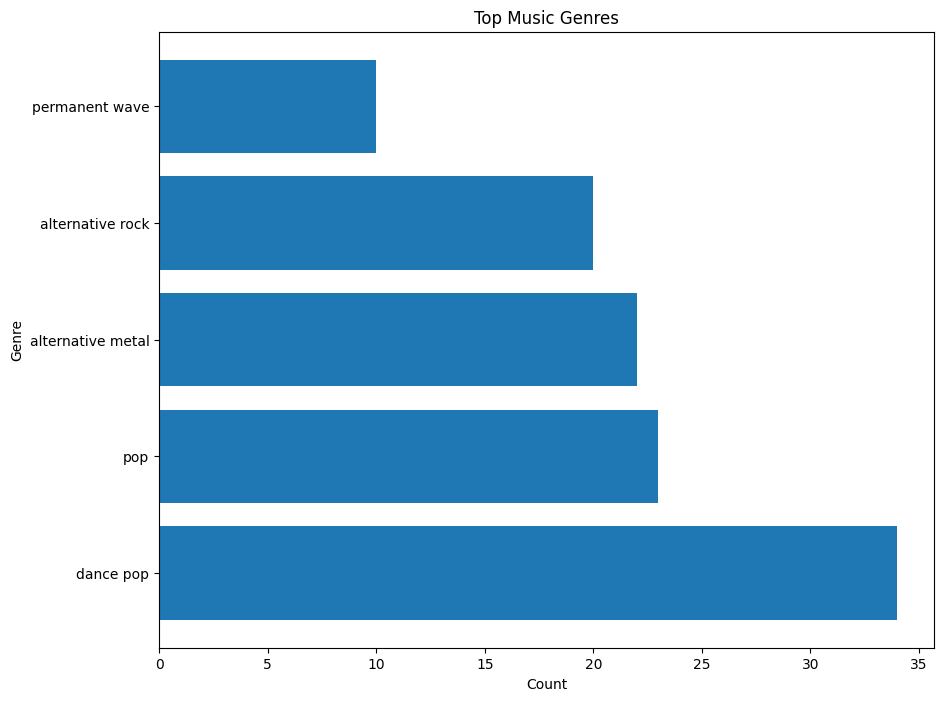

In [ ]:
#Top Music Genres Visualization
plt.figure(figsize=(10,8))
plt.barh(genre_count_sorted['Genre'].head(5), genre_count_sorted['Count'].head(5))
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top Music Genres')
plt.show()

In [ ]:
#Popularity Count Table Visualization
populatrity_counts = cl_df.groupby('Popularity').size().reset_index(name='Count')
populatrity_counts_sorted = populatrity_counts.sort_values(by='Popularity', ascending=False)
populatrity_counts_sorted.head(10)

,Popularity,Count
19,93,1
18,92,2
17,91,2
16,90,2
15,89,7
14,88,7
13,87,14
12,86,16
11,85,32
10,84,29


##6.2 Audio Features

In [ ]:
# Get the audio features for each track
audio_features_list = []
for track_id in cl_df['Track ID']:
    audio_features = sp.audio_features(track_id)[0]
    audio_features_list.append(audio_features)

# Convert the list of audio features to a dataframe
audio_features_df = pd.DataFrame(audio_features_list)
audio_features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.429,0.661,11,-7.227,1,0.0281,0.00239,0.000121,0.2340,0.285,173.372,audio_features,3AJwUDP919kvQ9QcozQPxg,spotify:track:3AJwUDP919kvQ9QcozQPxg,https://api.spotify.com/v1/tracks/3AJwUDP919kv...,https://api.spotify.com/v1/audio-analysis/3AJw...,266773,4
1,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.662,112.238,audio_features,7lQ8MOhq6IN2w8EYcFNSUk,spotify:track:7lQ8MOhq6IN2w8EYcFNSUk,https://api.spotify.com/v1/tracks/7lQ8MOhq6IN2...,https://api.spotify.com/v1/audio-analysis/7lQ8...,290320,4
2,0.556,0.864,3,-5.870,0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,audio_features,60a0Rd6pjrkxjPbaKzXjfq,spotify:track:60a0Rd6pjrkxjPbaKzXjfq,https://api.spotify.com/v1/tracks/60a0Rd6pjrkx...,https://api.spotify.com/v1/audio-analysis/60a0...,216880,4
3,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000000,0.0995,0.236,148.033,audio_features,003vvx7Niy0yvhvHt4a68B,spotify:track:003vvx7Niy0yvhvHt4a68B,https://api.spotify.com/v1/tracks/003vvx7Niy0y...,https://api.spotify.com/v1/audio-analysis/003v...,222973,4
4,0.778,0.824,10,-5.892,0,0.0707,0.28400,0.000000,0.4050,0.758,100.024,audio_features,3ZFTkvIE7kyPt6Nu3PEa7V,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...,https://api.spotify.com/v1/audio-analysis/3ZFT...,218093,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.689,0.481,10,-7.503,1,0.0815,0.36900,0.000001,0.0649,0.283,80.025,audio_features,2JzZzZUQj3Qff7wapcbKjc,spotify:track:2JzZzZUQj3Qff7wapcbKjc,https://api.spotify.com/v1/tracks/2JzZzZUQj3Qf...,https://api.spotify.com/v1/audio-analysis/2JzZ...,229526,4
293,0.288,0.758,6,-5.692,0,0.0371,0.00616,0.000000,0.3030,0.619,97.094,audio_features,2AT8iROs4FQueDv2c8q2KE,spotify:track:2AT8iROs4FQueDv2c8q2KE,https://api.spotify.com/v1/tracks/2AT8iROs4FQu...,https://api.spotify.com/v1/audio-analysis/2AT8...,201726,4
294,0.789,0.706,11,-4.233,0,0.0429,0.11200,0.000017,0.0586,0.638,125.911,audio_features,2ENexcMEMsYk0rVJigVD3i,spotify:track:2ENexcMEMsYk0rVJigVD3i,https://api.spotify.com/v1/tracks/2ENexcMEMsYk...,https://api.spotify.com/v1/audio-analysis/2ENe...,235493,4
295,0.671,0.673,11,-6.941,0,0.0444,0.14800,0.000053,0.3040,0.494,121.963,audio_features,1SOClUWhOi8vHZYMz3GluK,spotify:track:1SOClUWhOi8vHZYMz3GluK,https://api.spotify.com/v1/tracks/1SOClUWhOi8v...,https://api.spotify.com/v1/audio-analysis/1SOC...,237720,4


In [ ]:
audio_features_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,0.628027,0.687987,5.387205,-6.379923,0.636364,0.084574,0.168809,0.022490,0.165807,0.538874,117.611889,238554.414141,3.962963
std,0.160540,0.179425,3.569991,2.698043,0.481858,0.087261,0.225648,0.102132,0.123179,0.237260,27.107104,46522.772343,0.263760
min,0.209000,0.111000,0.000000,-18.090000,0.000000,0.023200,0.000018,0.000000,0.025000,0.038200,67.531000,119133.000000,1.000000
25%,0.512000,0.574000,2.000000,-7.807000,0.000000,0.035100,0.012600,0.000000,0.087800,0.361000,96.021000,208267.000000,4.000000
50%,0.641000,0.709000,5.000000,-5.795000,1.000000,0.047100,0.070900,0.000003,0.115000,0.549000,116.761000,233478.000000,4.000000
75%,0.749000,0.832000,8.000000,-4.565000,1.000000,0.083800,0.228000,0.000310,0.203000,0.737000,132.012000,267960.000000,4.000000
max,0.975000,0.988000,11.000000,-1.299000,1.000000,0.466000,0.978000,0.836000,0.709000,0.969000,203.006000,536067.000000,5.000000


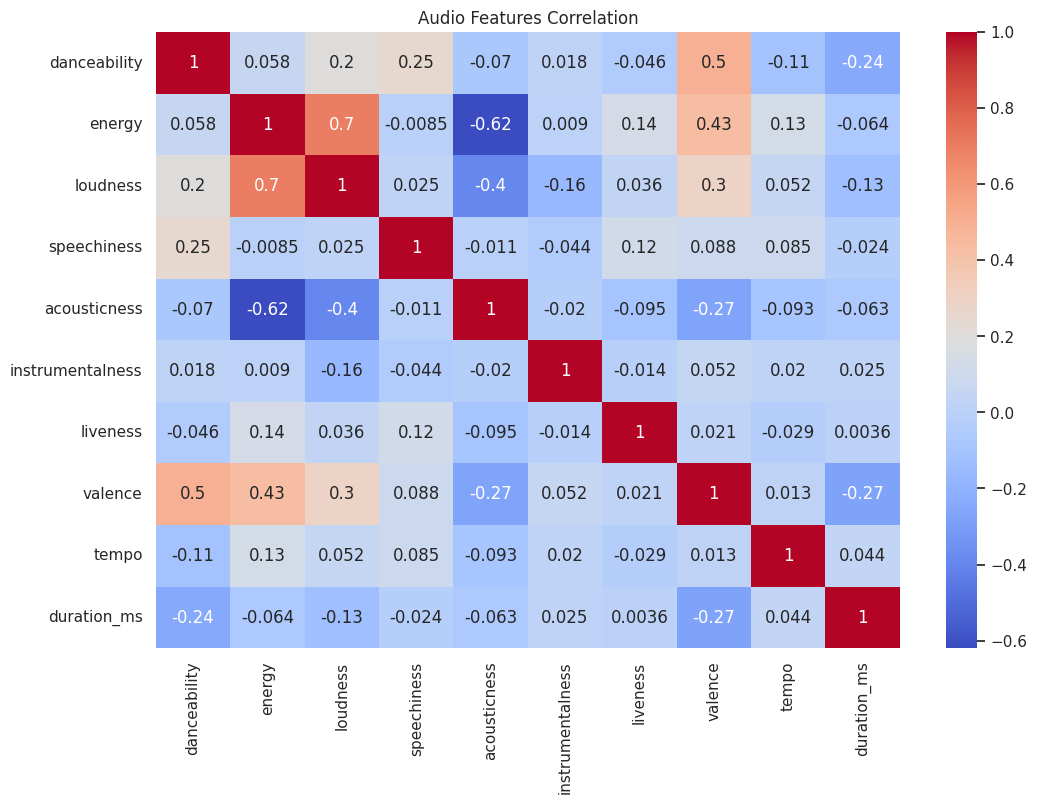

In [ ]:
# HeatMap Visualization for every song
sns.set()
plt.figure(figsize=(12, 8))
# Only relevant columns from the audio dataframe
audio_features_subset = audio_features_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','tempo','duration_ms']]
corr_matrix = audio_features_subset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Audio Features Correlation')
plt.show()


##6.3 Statistical Test

In [ ]:
audio_features_test = audio_features_df[['danceability', 'energy']]

# Calculate the correlation coefficient and p-value
corr_coef, p_value = stats.pearsonr(audio_features_test['danceability'], audio_features_test['energy'])

print(f"Pearson's correlation coefficient: {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")

Pearson's correlation coefficient: 0.0579
P-value: 0.3197


##6.4 Data by Decade

In [ ]:
#Top artist in decade based on songs Table Visualization
cl_df['decade'] = cl_df['Release Date'].apply(lambda x: int(str(x)[:3] + "0"))
artist_counts = cl_df.groupby(['decade', 'Artist Name']).size().reset_index(name='Song Count')

artist_counts_sorted = artist_counts.sort_values(by=['decade', 'Song Count'], ascending=[True, False])
top_artist_by_decade = artist_counts_sorted.drop_duplicates(subset='decade', keep='first')

top_artist_by_decade

<ipython-input-21-3f084a7c1b82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_df['decade'] = cl_df['Release Date'].apply(lambda x: int(str(x)[:3] + "0"))


,decade,Artist Name,Song Count
0,1980,Chris Isaak,1
44,1990,Red Hot Chili Peppers,5
84,2000,Coldplay,5
138,2010,Billie Eilish,5
197,2020,House Of Pain,1


In [ ]:
#Audio Features based on mean of Audio Features
#Rename the "id" column to "Track ID"
audio_features_df.rename(columns={'id': 'Track ID'}, inplace=True)

merged_df = pd.merge(cl_df[['Track ID', 'decade']], audio_features_df, on='Track ID')

df_by_decade = merged_df.groupby('decade').mean()

df_by_decade

<ipython-input-248-5d22e087b142>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_by_decade = merged_df.groupby('decade').mean()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
decade,,,,,,,,,,,,,
1980,0.663000,0.296000,9.000000,-18.090000,1.000000,0.029400,0.680000,0.008370,0.087900,0.359000,112.306000,289067.000000,4.000000
1990,0.577111,0.711051,5.585859,-7.164384,0.676768,0.070126,0.132787,0.028377,0.174854,0.565760,118.301303,253242.636364,3.929293
2000,0.658213,0.753146,5.382022,-5.321236,0.595506,0.092672,0.112670,0.021828,0.174261,0.564767,120.332854,241788.719101,3.988764
2010,0.647991,0.614850,5.186916,-6.429551,0.635514,0.092116,0.245117,0.017937,0.151206,0.491449,114.860215,221989.065421,3.971963
2020,0.811000,0.823000,4.000000,-5.921000,0.000000,0.042300,0.055300,0.000005,0.158000,0.827000,106.929000,218547.000000,4.000000


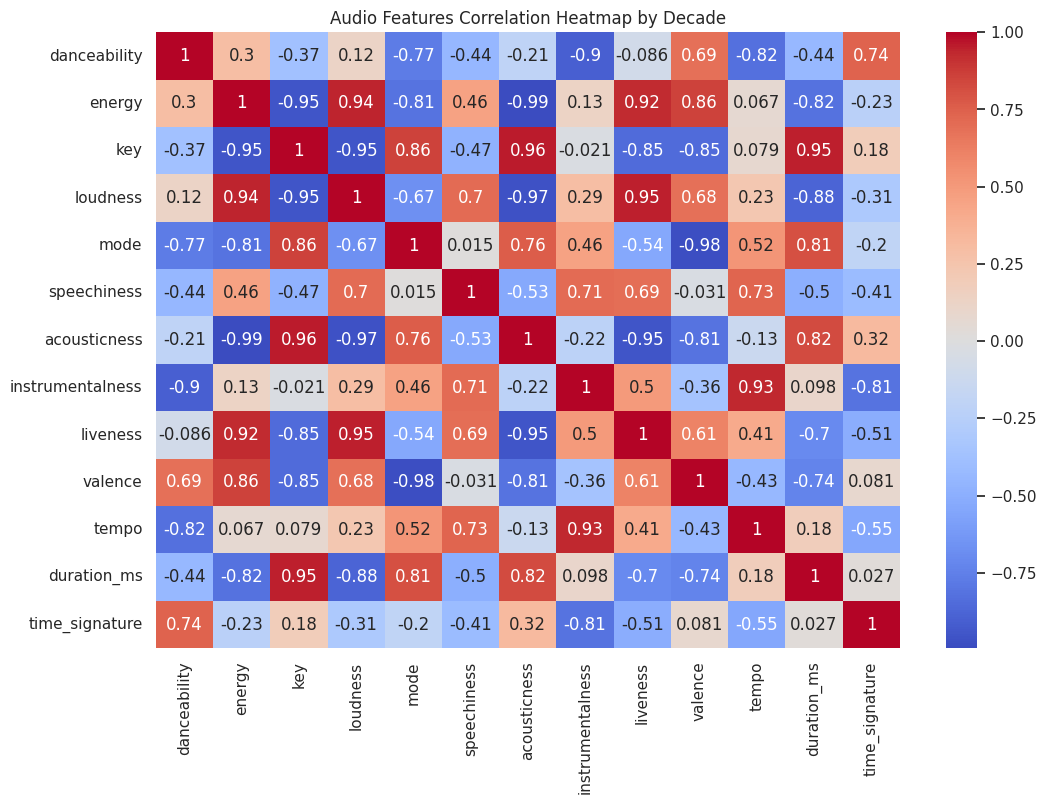

In [ ]:
# HeatMap Visualization for Mean of each Decade Audio Features
sns.set()
plt.figure(figsize=(12, 8))
sns.heatmap(df_by_decade.corr(), cmap="coolwarm", annot=True)
plt.title('Audio Features Correlation Heatmap by Decade')
plt.show()

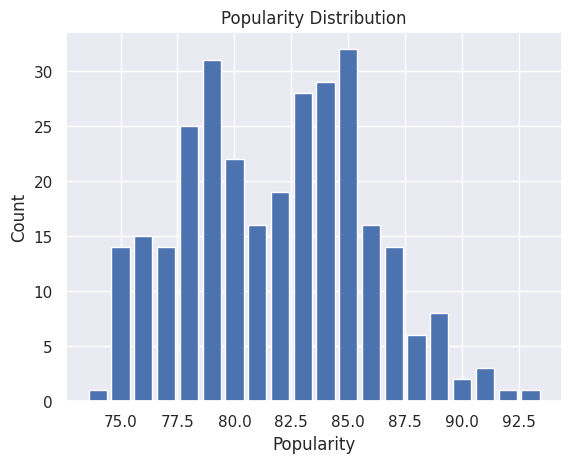

In [ ]:
# Popularity distribution of Songs Visualization
plt.bar(populatrity_counts_sorted['Popularity'], populatrity_counts_sorted['Count'])
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Popularity Distribution')
plt.show()


In [ ]:
artist_counts = cl_df.groupby(['Popularity', 'Artist Name','decade']).size().reset_index(name='Song Count')

artist_counts_sorted = artist_counts.sort_values(by=['Popularity', 'Song Count'], ascending=[False, True])
top_artist_by_decade = artist_counts_sorted.drop_duplicates(subset='Popularity', keep='first')

top_artist_by_decade.head(10)

,Popularity,Artist Name,decade,Song Count
276,93,The Weeknd,2010,1
275,92,Tom Odell,2010,1
272,91,Miguel,2010,1
270,90,Coldplay,2000,1
262,89,Billie Eilish,2010,1
259,88,Eminem,2000,1
247,87,Bruno Mars,2010,1
230,86,Drake,2010,1
201,85,AC/DC,1990,1
175,84,Ariana Grande,2010,1


##6.5 Features of most popular overall song

In [ ]:
popularity_sorted = cl_df.sort_values(by='Popularity', ascending=False)
top_songs = popularity_sorted.head(5)
top_songs

,Track Name,Artist Name,Duration (ms),Genre,Track ID,Release Date,Popularity,decade
200,Starboy,The Weeknd,230453,canadian contemporary r&b,7MXVkk9YMctZqd1Srtv4MB,2016-11-25,93,2010
201,Another Love,Tom Odell,244360,chill pop,3JvKfv6T31zO0ini8iNItO,2013-06-24,92,2010
202,See You Again (feat. Kali Uchis),"Tyler, The Creator",180386,hip hop,7KA4W4McWYRpgf0fWsJZWB,2017-07-21,91,2010
203,Sure Thing,Miguel,195373,r&b,0JXXNGljqupsJaZsgSbMZV,2010-11-26,91,2010
204,Sweater Weather,The Neighbourhood,240400,modern alternative rock,2QjOHCTQ1Jl3zawyYOpxh6,2013-04-19,91,2010


In [ ]:
# Get the track IDs of the most popular song
most_popular_track_ids = cl_df.nlargest(1, 'Popularity')['Track ID']

# Filter the audio features by ID
most_popular_tracks_features = audio_features_df[audio_features_df['Track ID'].isin(most_popular_track_ids)]

top_song = most_popular_tracks_features[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','tempo','duration_ms']]
top_song

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
199,0.679,0.587,-7.015,0.276,0.141,0.000006,0.137,0.486,186.003,230453
